<a href="https://colab.research.google.com/github/MehrdadJalali-AI/BlackHole/blob/main/Node_Statistics_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

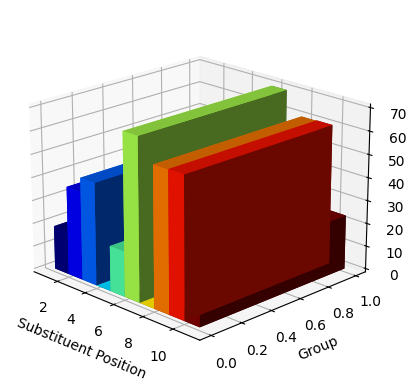

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of bars
n = 10

# Generate random data for demonstration
x = np.linspace(1, 10, n)
y = np.zeros(n)
z = np.zeros(n)

dx = np.ones(n)  # Width of the bars along the x-axis
dy = np.ones(n)  # Depth of the bars along the y-axis
dz = np.random.rand(n) * 100  # Heights of the bars

# Create a figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set colors for each bar
colors = plt.cm.jet(np.linspace(0, 1, n))

# Plotting each bar
for i in range(n):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i], color=colors[i])

# Setting the labels
ax.set_xlabel('Substituent Position')
ax.set_ylabel('Group')
ax.set_zlabel('BDE Value')

# Set the view angle for better visualization
ax.view_init(elev=20, azim=-45)

# Show the plot
plt.show()


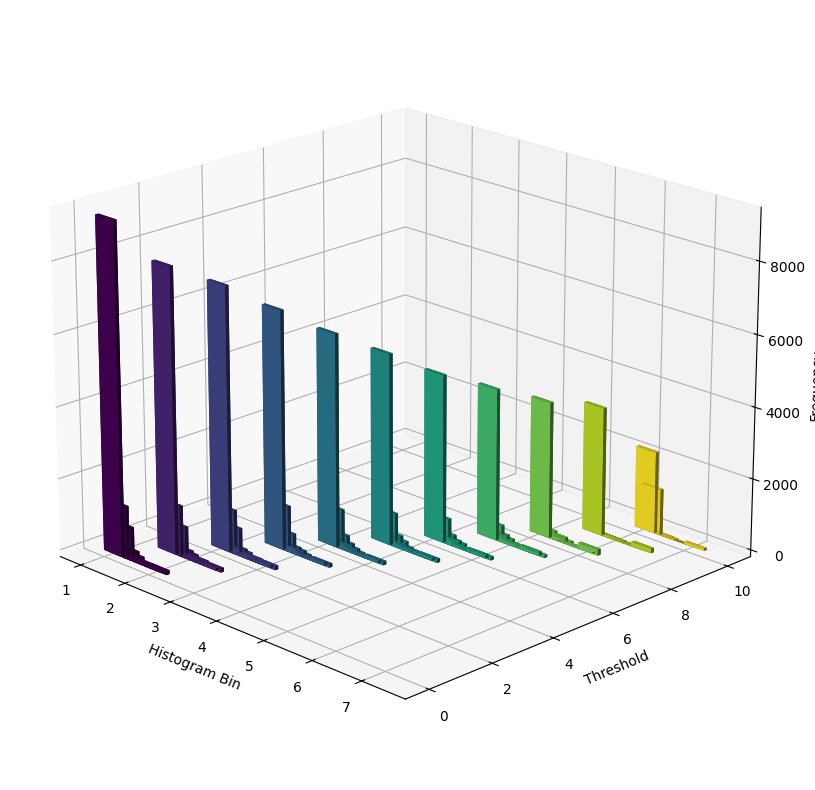

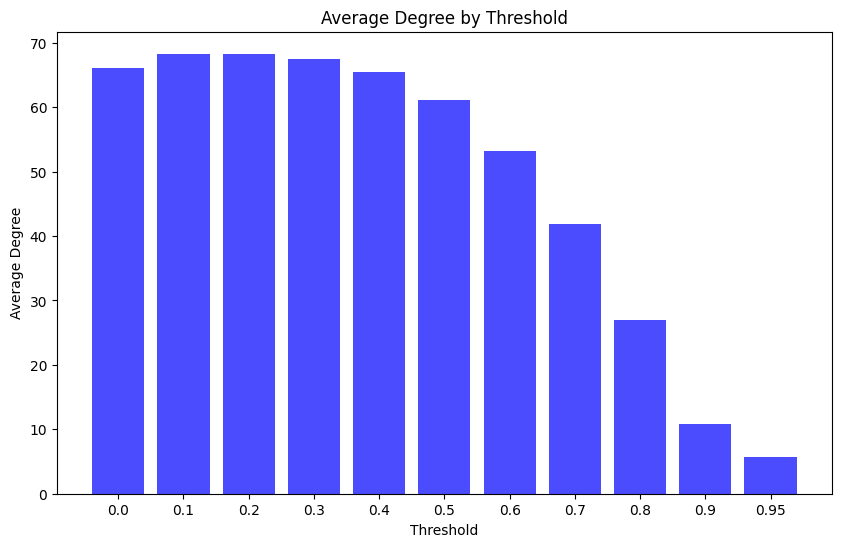

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]

# Function to read data, calculate histogram and average degree
def get_degree_data(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Degree' in data.columns:
            counts, _ = np.histogram(data['Degree'], bins=10)
            avg_degree = data['Degree'].mean()
            return counts, avg_degree
        else:
            print(f"'Degree' column not found in {file_path}")
            return None, None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# Collect all histograms and average degrees
degree_data = [get_degree_data(path) for path in file_paths]
degree_distributions = [data[0] for data in degree_data if data[0] is not None]
average_degrees = [data[1] for data in degree_data if data[1] is not None]

# First plot: Histograms in 3D
fig1 = plt.figure(figsize=(14, 10))
ax1 = fig1.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, len(degree_distributions)))

# Plotting histograms
for i, counts in enumerate(degree_distributions):
    if counts is not None:
        x = np.linspace(1 + i * 0.5, 1 + i * 0.5 + 1, 10)  # Adjust x for each histogram
        y = np.full(10, i)  # Y position set to the index of the threshold
        ax1.bar3d(x, y, np.zeros(10), 0.4, 0.1, counts, color=colors[i])

ax1.set_xlabel('Histogram Bin')
ax1.set_ylabel('Threshold')
ax1.set_zlabel('Frequency')
ax1.view_init(elev=20, azim=-45)

# Second plot: Average Degree
fig2, ax2 = plt.figure(figsize=(10, 6)), plt.subplot()
ax2.bar(thresholds, average_degrees, color='blue', alpha=0.7)
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Average Degree')
ax2.set_title('Average Degree by Threshold')

plt.show()



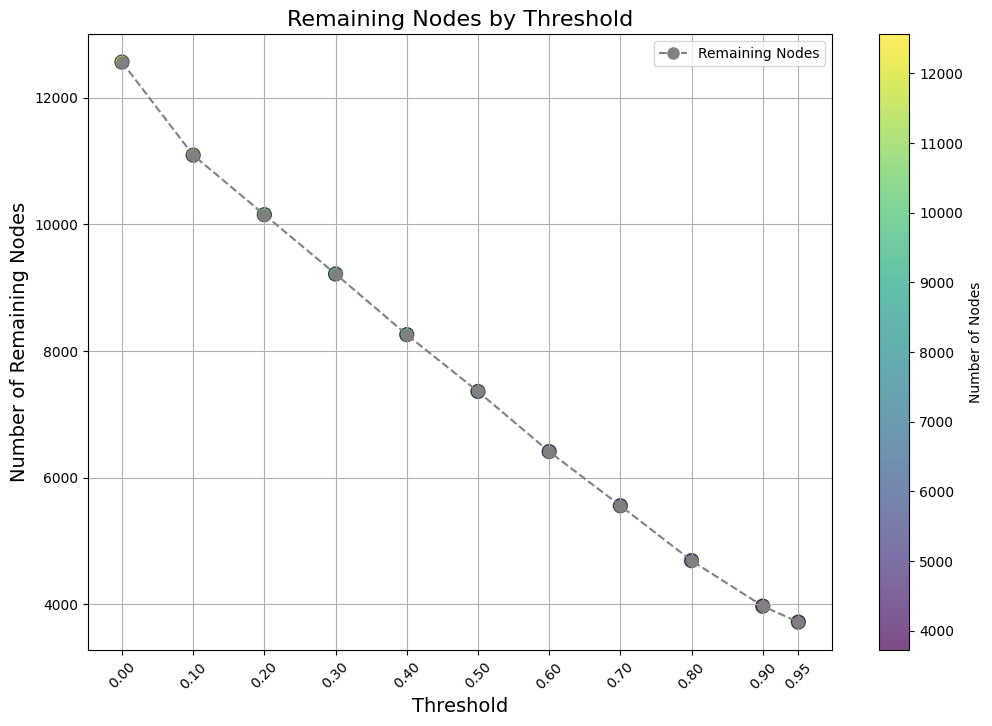

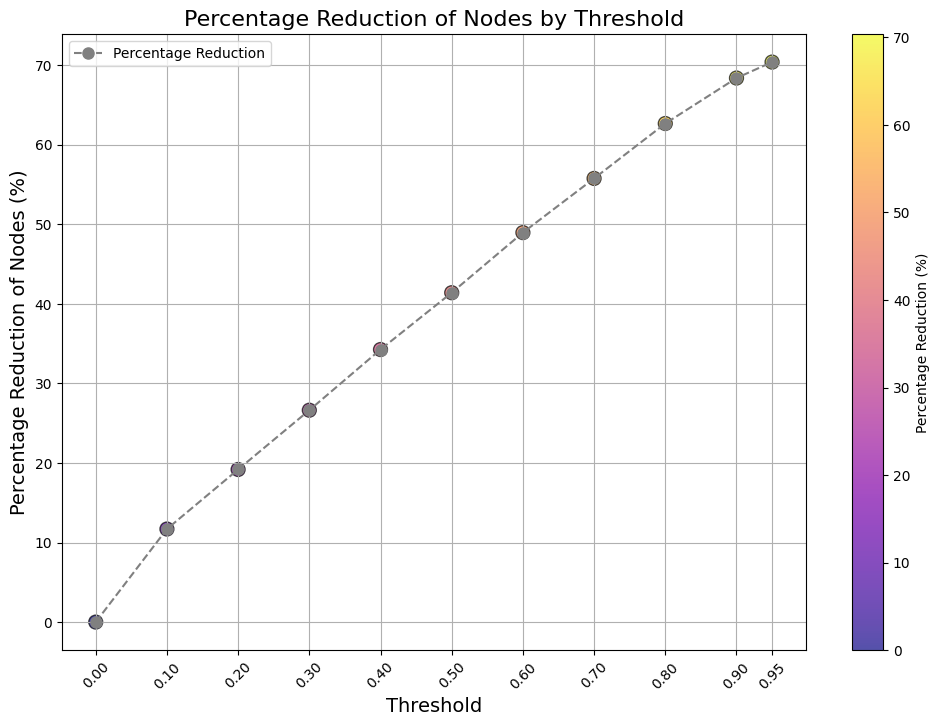

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]

# Initialize lists to store the data
num_nodes = []
threshold_labels = []

# Loop through each file path and count the number of nodes
for path in file_paths:
    data = pd.read_csv(path)
    num_nodes.append(data['Id'].nunique())  # Assumes 'Id' is the column with node IDs
    threshold_labels.append(path.split('_')[-1].split('.csv')[0])  # Extracts threshold from filename

# Calculate the percentage reduction of nodes
initial_nodes = num_nodes[0]  # Number of nodes at threshold 0.0
percentage_reduction = [100 * (1 - x / initial_nodes) for x in num_nodes]

# Convert lists to arrays for better handling in plots
thresholds_array = np.array([float(label) for label in threshold_labels])
num_nodes_array = np.array(num_nodes)
percentage_reduction_array = np.array(percentage_reduction)

# Creating a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(thresholds)))

# Plot 1: Remaining Nodes by Threshold
fig, ax1 = plt.subplots(figsize=(12, 8))
scatter1 = ax1.scatter(thresholds_array, num_nodes_array, c=num_nodes_array, cmap='viridis', s=100, edgecolor='k', alpha=0.7)
ax1.plot(thresholds_array, num_nodes_array, label='Remaining Nodes', color='gray', linestyle='--', marker='o', markersize=8)
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Number of Nodes')
ax1.set_xlabel('Threshold', fontsize=14)
ax1.set_ylabel('Number of Remaining Nodes', fontsize=14)
ax1.set_title('Remaining Nodes by Threshold', fontsize=16)
# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax1.grid(True)
ax1.legend()

# Plot 2: Percentage Reduction of Nodes by Threshold
fig, ax2 = plt.subplots(figsize=(12, 8))
scatter2 = ax2.scatter(thresholds_array, percentage_reduction_array, c=percentage_reduction_array, cmap='plasma', s=100, edgecolor='k', alpha=0.7)
ax2.plot(thresholds_array, percentage_reduction_array, label='Percentage Reduction', color='gray', linestyle='--', marker='o', markersize=8)
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Percentage Reduction (%)')
ax2.set_xlabel('Threshold', fontsize=14)
ax2.set_ylabel('Percentage Reduction of Nodes (%)', fontsize=14)
ax2.set_title('Percentage Reduction of Nodes by Threshold', fontsize=16)

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax2.grid(True)
ax2.legend()

plt.show()



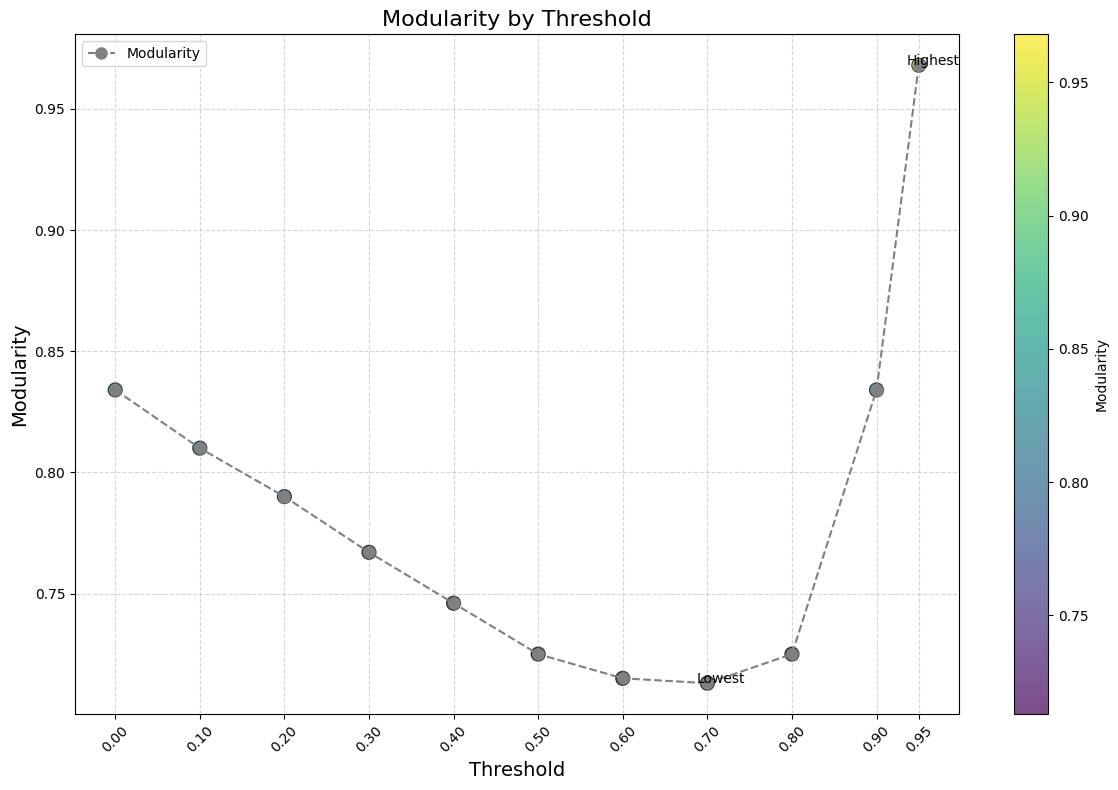

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Modularity.csv file
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'
modularity_path = os.path.join(directory_path, 'Modularity.csv')

# Load Modularity data
modularity_data = pd.read_csv(modularity_path)

# Sorting data by Dataset (Threshold) if not already sorted
modularity_data.sort_values('Dataset', inplace=True)

# Assuming the Dataset values are stored as strings, convert them to float for sorting purposes if necessary
modularity_data['Dataset'] = modularity_data['Dataset'].astype(float)

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a color gradient based on the modularity values
norm = plt.Normalize(min(modularity_data['Modularity']), max(modularity_data['Modularity']))
colors = plt.cm.viridis(norm(modularity_data['Modularity']))

# Line plot with color gradient and markers
scatter = ax.scatter(modularity_data['Dataset'], modularity_data['Modularity'], c=modularity_data['Modularity'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(modularity_data['Dataset'], modularity_data['Modularity'], label='Modularity', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Modularity')

# Annotating the highest and lowest points
ax.annotate('Highest', xy=(modularity_data['Dataset'][modularity_data['Modularity'].idxmax()], max(modularity_data['Modularity'])), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')
ax.annotate('Lowest', xy=(modularity_data['Dataset'][modularity_data['Modularity'].idxmin()], min(modularity_data['Modularity'])), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')

# Adding labels and title
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Modularity', fontsize=14)
ax.set_title('Modularity by Threshold', fontsize=16)

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

# Showing the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


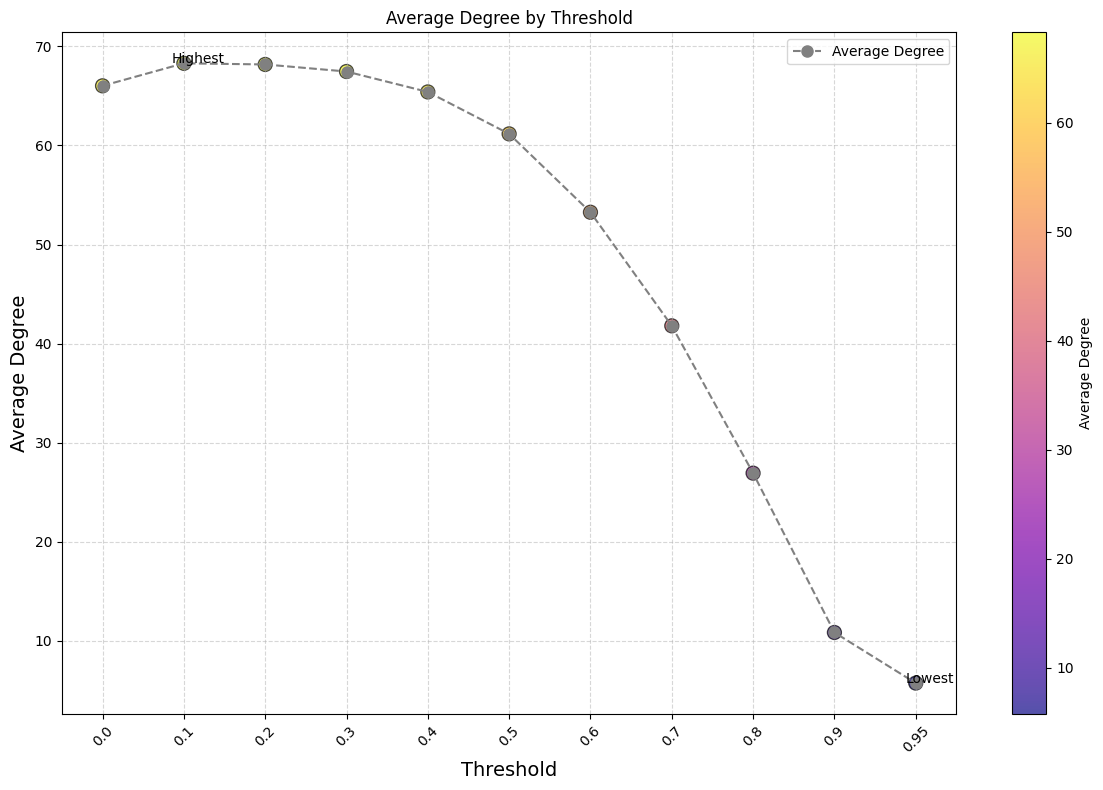

In [42]:


import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]


# Function to read data, calculate histogram and average degree
def get_degree_data(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Degree' in data.columns:
            counts, _ = np.histogram(data['Degree'], bins=10)
            avg_degree = data['Degree'].mean()
            return counts, avg_degree
        else:
            print(f"'Degree' column not found in {file_path}")
            return None, None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# Collect all histograms and average degrees
degree_data = [get_degree_data(path) for path in file_paths]
average_degrees = [data[1] for data in degree_data if data[1] is not None]

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a color gradient based on the average degree values
norm = plt.Normalize(min(average_degrees), max(average_degrees))
colors = plt.cm.plasma(norm(average_degrees))

# Line plot with color gradient and markers
scatter = ax.scatter(thresholds, average_degrees, c=average_degrees, cmap='plasma', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(thresholds, average_degrees, label='Average Degree', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Average Degree')

# Annotating the highest and lowest points
ax.annotate('Highest', xy=(thresholds[np.argmax(average_degrees)], max(average_degrees)), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')
ax.annotate('Lowest', xy=(thresholds[np.argmin(average_degrees)], min(average_degrees)), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')

# Adding labels and title
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Average Degree', fontsize=14)
ax.set_title('Average Degree by Threshold')

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)

# Showing the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


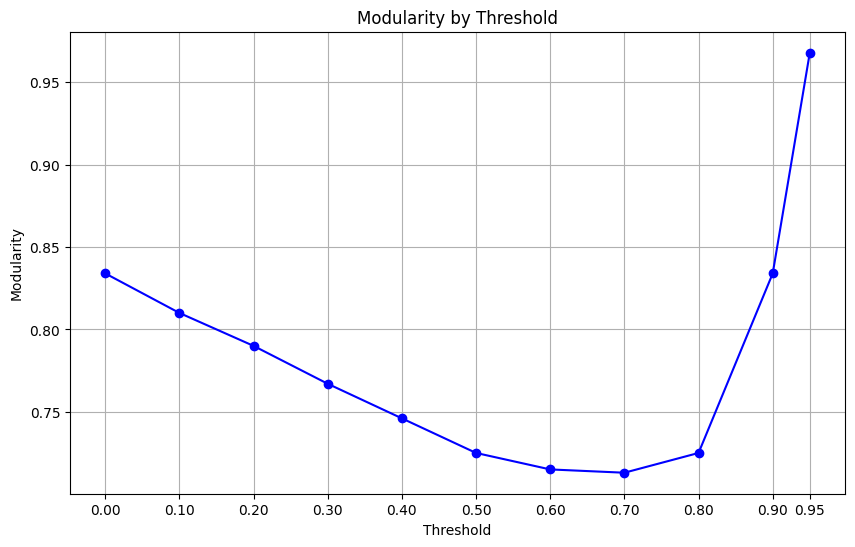

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Modularity.csv file
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'
modularity_path = os.path.join(directory_path, 'Modularity.csv')

# Load Modularity data
modularity_data = pd.read_csv(modularity_path)

# Sorting data by Dataset (Threshold) if not already sorted
modularity_data.sort_values('Dataset', inplace=True)

# Assuming the Dataset values are stored as strings, convert them to float for sorting purposes if necessary
modularity_data['Dataset'] = modularity_data['Dataset'].astype(float)

# Plotting the modularity data
plt.figure(figsize=(10, 6))
plt.plot(modularity_data['Dataset'], modularity_data['Modularity'], marker='o', linestyle='-', color='b')
plt.xlabel('Threshold')
plt.ylabel('Modularity')
plt.title('Modularity by Threshold')
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])  # Explicitly set the x-ticks
plt.grid(True)
plt.show()



In [7]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics')

Mounted at /content/drive
